In [1]:
# binder https://hub.gke.mybinder.org/user/blychs-climatologia_fisica-dckeuhha/notebooks/practica2.ipynb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import copy
from metpy.units import units
import metpy.calc as mpcalc
import metpy.constants as mpconsts
import datetime as dt
import calendar
import seaborn as sns
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
#from funciones_meteo import load_file, ploteo_general, calculate_h

In [2]:
def band_area(lat1, lat2):
    r = 6371000
    cap = lambda x: 2 * np.pi * (6371000**2) * np.abs(np.sin(np.deg2rad(x)) - 1)
    a1 = cap(lat1)
    a2 = cap(lat2)
    return np.abs(cap(lat1) - cap(lat2))

def cell_area(lat1, lat2, lon1, lon2):
    return (np.abs(lon1 - lon2) / 360 * band_area(lat1,lat2))

print(band_area(80, 90))
cell_area(80, 90, 87, 88) * 360

3874512718475.5938


3874512718475.5938

In [3]:
# Load files CMIP5

pr_c5_hist = xr.open_mfdataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_mes.nc',
                              combine='nested',
                              concat_dim='ensemble').mean('ensemble',
                                                          keep_attrs=True).metpy.parse_cf('pr')
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_mes.nc'
                                ).metpy.parse_cf('pr')
pr_c5_26_far   = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_mes.nc'
                                ).metpy.parse_cf('pr')
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_mes.nc'
                                ).metpy.parse_cf('pr')
pr_c5_85_far   = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_mes.nc'
                                ).metpy.parse_cf('pr')
# """"""""""""""""""""""""""""""""""""""""""
ev_c5_hist = xr.open_mfdataset('NorESM1-M/evspsbl_Amon_NorESM1-M_historical_r1i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='ensemble').mean('ensemble',
                                                           keep_attrs=True).metpy.parse_cf('evspsbl')
ev_c5_26_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                ).metpy.parse_cf('evspsbl')
ev_c5_26_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                ).metpy.parse_cf('evspsbl')
ev_c5_85_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                ).metpy.parse_cf('evspsbl')
ev_c5_85_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                ).metpy.parse_cf('evspsbl')
# """"""""""""""""""""""""""""""""""""""""""
ep_c5_hist = xr.open_mfdataset('NorESM1-M/etp_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='ensemble').mean('ensemble',
                                                           keep_attrs=True).metpy.parse_cf('etp')
ep_c5_26_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                ).metpy.parse_cf('etp')
ep_c5_26_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                ).metpy.parse_cf('etp')
ep_c5_85_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                ).metpy.parse_cf('etp')
ep_c5_85_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                ).metpy.parse_cf('etp')
# """"""""""""""""""""""""""""""""""""""""""""

t_c5_hist = xr.open_mfdataset('NorESM1-M/tas_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                              combine='nested',
                              concat_dim='ensemble').mean('ensemble',
                                                          keep_attrs=True).metpy.parse_cf('tas')
t_c5_26_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                               ).metpy.parse_cf('tas')
t_c5_26_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                               ).metpy.parse_cf('tas')
t_c5_85_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                               ).metpy.parse_cf('tas')
t_c5_85_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                               ).metpy.parse_cf('tas')
# """"""""""""""""""""""""""""""""""""""
q_c5_hist = xr.open_mfdataset('NorESM1-M/huss_historical_r*_anu.nc',
                            combine='nested',
                            concat_dim='ensemble').mean('ensemble',
                                                        keep_attrs=True).metpy.parse_cf('huss')
q_c5_26_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_202001-204912_2.5_anu.nc'
                               ).metpy.parse_cf('huss')
q_c5_26_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_207001-209912_2.5_anu.nc'
                               ).metpy.parse_cf('huss')
q_c5_85_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc'
                               ).metpy.parse_cf('huss')
q_c5_85_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_207001-209912_2.5_anu.nc'
                               ).metpy.parse_cf('huss')

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longi

In [4]:
# Load files CMIP6
pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                              combine='nested',
                              concat_dim='ensemble').mean('ensemble',
                                                          keep_attrs=True).metpy.parse_cf('pr')
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc'
                                 ).metpy.parse_cf('pr')
pr_c6_126_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 ).metpy.parse_cf('pr')
pr_c6_585_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_mes.nc'
                                 ).metpy.parse_cf('pr')
pr_c6_585_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_mes.nc'
                                 ).metpy.parse_cf('pr')
# """"""""""""""""""""""""""""""""""""""
ev_c6_hist = xr.open_mfdataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                               combine='nested',
                               concat_dim='ensemble').mean('ensemble',
                                                           keep_attrs=True).metpy.parse_cf('evspsbl')
ev_c6_126_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc'
                                 ).metpy.parse_cf('evspsbl')
ev_c6_126_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 ).metpy.parse_cf('evspsbl')
ev_c6_585_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2020-2049_2.5_mes.nc'
                                 ).metpy.parse_cf('evspsbl')
ev_c6_585_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2070-2099_2.5_mes.nc'
                                 ).metpy.parse_cf('evspsbl')
# """"""""""""""""""""""""""""""""""""""
ep_c6_hist = xr.open_mfdataset('NorESM2-LM/etp_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                               combine='nested',
                               concat_dim='ensemble').mean('ensemble',
                                                           keep_attrs=True).metpy.parse_cf('etp')
ep_c6_126_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc'
                                 ).metpy.parse_cf('etp')
ep_c6_126_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                 ).metpy.parse_cf('etp')
ep_c6_585_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_anu.nc'
                                 ).metpy.parse_cf('etp')
ep_c6_585_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_anu.nc'
                                 ).metpy.parse_cf('etp')
# """"""""""""""""""""""""""""""""""""""
t_c6_hist = xr.open_mfdataset('NorESM2-LM/tas_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested',
                              concat_dim='ensemble').mean('ensemble',
                                                          keep_attrs=True).metpy.parse_cf('tas')
t_c6_126_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc'
                                ).metpy.parse_cf('tas')
t_c6_126_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc'
                                ).metpy.parse_cf('tas')
t_c6_585_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc'
                                ).metpy.parse_cf('tas')
t_c6_585_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc'
                                ).metpy.parse_cf('tas')
# """"""""""""""""""""""""""""""""""""""
q_c6_hist = xr.open_mfdataset('NorESM2-LM/huss_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested',
                              concat_dim='ensemble').mean('ensemble',
                                                          keep_attrs=True).metpy.parse_cf('huss')
q_c6_126_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc'
                                ).metpy.parse_cf('huss')
q_c6_126_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc'
                                ).metpy.parse_cf('huss')
q_c6_585_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc'
                                ).metpy.parse_cf('huss')
q_c6_585_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc'
                                ).metpy.parse_cf('huss')
# """"""""""""""""""""""""""""""""""""""

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longi

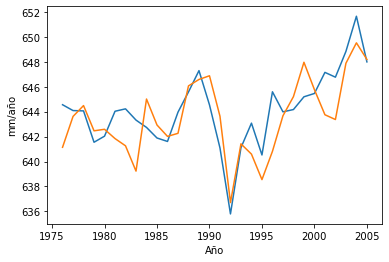

In [5]:
#ev_c5_hist.mean(dim=('lat', 'lon')).plot()
y_ev = ev_c5_hist.groupby('time.year').sum(dim='time')
y_pr = pr_c5_hist.groupby('time.year').sum(dim='time')
plt.plot(y_pr.year, (y_pr * np.cos(np.deg2rad(y_pr.lat))).mean(dim=('lat', 'lon')))
plt.plot(y_ev.year, (y_ev * np.cos(np.deg2rad(y_ev.lat))).mean(dim=('lat', 'lon')))
plt.xlabel('Año')
plt.ylabel('mm/año')
plt.show()


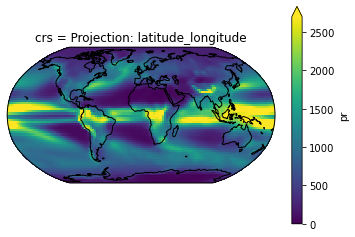

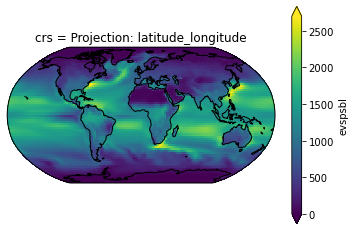

In [6]:
ax = plt.axes(projection=ccrs.Robinson())
y_pr.mean(dim='year').plot(vmin=0, vmax=2700, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

#plt.figure(figsize=(19,10))
ax = plt.axes(projection=ccrs.Robinson())
(ev_c5_hist.mean(dim='time')).plot(vmin=0, vmax=2700, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

In [7]:
#df_p_e = pd.Dataframe()

def tabla_bandas_latitud_peixoto(pr, ev):
    p_e_df = pd.DataFrame(columns=['Lat', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])

    def nice_lat(lat):
        if lat < 0:
            nice = str(np.abs(lat)) + '°S'
        elif lat > 0:
            nice = str(np.abs(lat)) + '°N'
        elif lat == 0:
            nice = str(np.abs(lat)) + '°'
        return nice

    for i in range(-90, 90, 10):
        precip = np.around((pr).where(pr.lat >= i
                                     ).where(pr.lat <= (i + 10)
                                              ).mean(dim=('lat', 'lon', 'year')).values)
        evap = np.around((ev).where(ev.lat >= i
                                     ).where(ev.lat <= (i + 10)
                                            ).mean(dim=('lat', 'lon', 'year')).values)
        df2 = pd.DataFrame([[nice_lat(i) + ' - ' + nice_lat((i + 10)), precip,
                             evap, precip-evap,
                             evap/precip, (precip-evap)/precip]],
                       columns=['Lat', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
        p_e_df =  p_e_df.append(df2)
    return p_e_df

print(tabla_bandas_latitud_peixoto(y_pr, y_ev))

           Lat       P       E    P-E       E/P   (P-E)/P
0  90°S - 80°S   101.0     3.0   98.0  0.029703  0.970297
0  80°S - 70°S   268.0    35.0  233.0  0.130597  0.869403
0  70°S - 60°S   675.0   243.0  432.0  0.360000  0.640000
0  60°S - 50°S   981.0   534.0  447.0  0.544343  0.455657
0  50°S - 40°S  1011.0   836.0  175.0  0.826904  0.173096
0  40°S - 30°S   907.0  1198.0 -291.0  1.320838 -0.320838
0  30°S - 20°S   758.0  1371.0 -613.0  1.808707 -0.808707
0  20°S - 10°S  1086.0  1571.0 -485.0  1.446593 -0.446593
0    10°S - 0°  1855.0  1420.0  435.0  0.765499  0.234501
0    0° - 10°N  1927.0  1383.0  544.0  0.717696  0.282304
0  10°N - 20°N  1064.0  1413.0 -349.0  1.328007 -0.328008
0  20°N - 30°N   611.0  1144.0 -533.0  1.872340 -0.872340
0  30°N - 40°N   894.0  1017.0 -123.0  1.137584 -0.137584
0  40°N - 50°N   862.0   684.0  178.0  0.793503  0.206497
0  50°N - 60°N   810.0   510.0  300.0  0.629630  0.370370
0  60°N - 70°N   595.0   279.0  316.0  0.468908  0.531092
0  70°N - 80°N

In [8]:
#df_p_e = pd.Dataframe()

def tabla_bandas_latitud_peixoto(pr, ev):
    p_e_df = pd.DataFrame(columns=['Lat', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])

    def nice_lat(lat):
        if lat < 0:
            nice = str(np.abs(lat)) + '°S'
        elif lat > 0:
            nice = str(np.abs(lat)) + '°N'
        elif lat == 0:
            nice = str(np.abs(lat)) + '°'
        return nice

    for i in range(-90, 90, 10):
        precip = ((pr).where(pr.lat >= i
                                     ).where(pr.lat <= (i + 10)
                                              ).mean(dim=('lat', 'lon', 'year')).values)
        evap = ((ev).where(ev.lat >= i
                                     ).where(ev.lat <= (i + 10)
                                            ).mean(dim=('lat', 'lon', 'year')).values)
        df2 = pd.DataFrame([[nice_lat(i) + ' - ' + nice_lat((i + 10)), precip,
                             evap, precip-evap,
                             evap/precip, (precip-evap)/precip]],
                       columns=['Lat', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
        df2['P'] = df2['P'].astype(int)
        df2['E'] = df2['E'].astype(int)
        df2['P-E'] = df2['P-E'].astype(int)
        p_e_df =  p_e_df.append(df2)
    return p_e_df

print(tabla_bandas_latitud_peixoto(y_pr, y_ev))

           Lat     P     E   P-E       E/P   (P-E)/P
0  90°S - 80°S   101     3    98  0.032924  0.967076
0  80°S - 70°S   268    34   233  0.130322  0.869677
0  70°S - 60°S   674   243   431  0.360464  0.639536
0  60°S - 50°S   981   534   446  0.544689  0.455311
0  50°S - 40°S  1011   836   175  0.826792  0.173208
0  40°S - 30°S   907  1198  -291  1.321052 -0.321052
0  30°S - 20°S   758  1370  -612  1.807991 -0.807990
0  20°S - 10°S  1085  1570  -485  1.446793 -0.446793
0    10°S - 0°  1855  1420   435  0.765336  0.234664
0    0° - 10°N  1926  1382   543  0.717766  0.282234
0  10°N - 20°N  1064  1412  -348  1.327565 -0.327565
0  20°N - 30°N   611  1144  -532  1.872031 -0.872031
0  30°N - 40°N   893  1017  -123  1.138223 -0.138223
0  40°N - 50°N   861   683   178  0.793395  0.206605
0  50°N - 60°N   810   510   300  0.629401  0.370599
0  60°N - 70°N   594   279   315  0.469415  0.530585
0  70°N - 80°N   340   115   225  0.338851  0.661148
0  80°N - 90°N   238    34   203  0.146538  0.